In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

/home/jk/enter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("test.csv")
df.tail()

,Case,Restaurant,Price,Food,Decor,Service,East
163,164,Baci,31,17,15,16,0
164,165,Puccini,26,20,16,17,0
165,166,Bella Luna,31,18,16,17,0
166,167,Métisse,38,22,17,21,0
167,168,Gennaro,34,24,10,16,0


In [3]:
df = df.drop(labels = ["Case"], axis=1)
df.tail()

,Restaurant,Price,Food,Decor,Service,East
163,Baci,31,17,15,16,0
164,Puccini,26,20,16,17,0
165,Bella Luna,31,18,16,17,0
166,Métisse,38,22,17,21,0
167,Gennaro,34,24,10,16,0


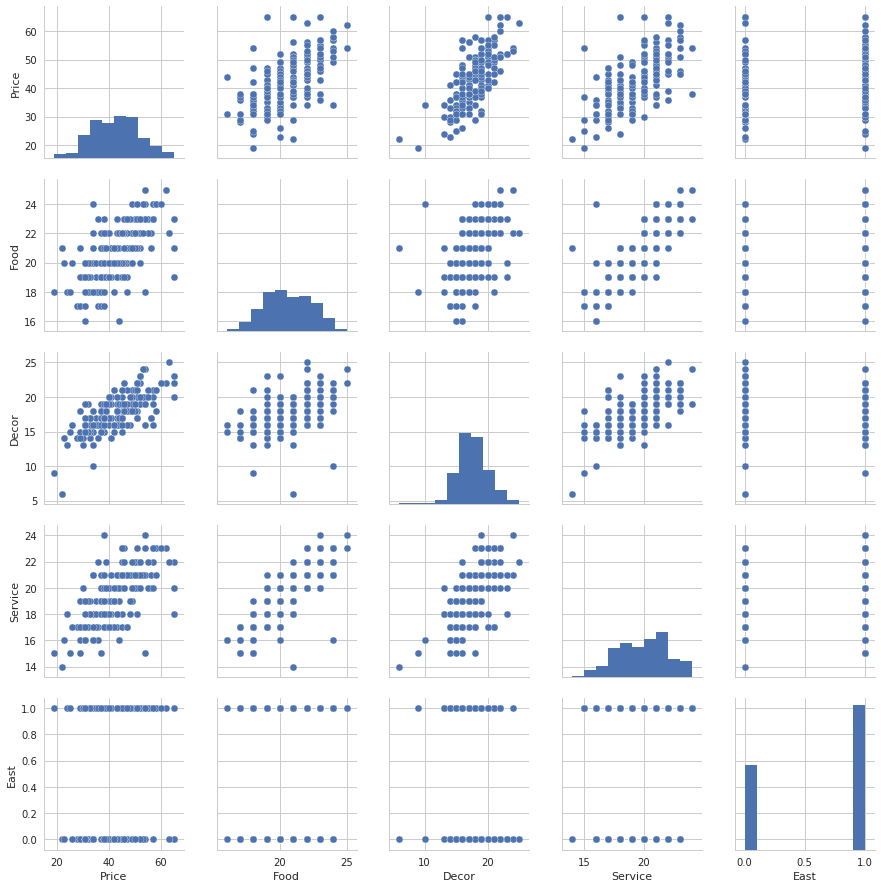

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
# df2 = pd.get_dummies(df, columns=["Restaurant"], prefix='Restaurant')


In [16]:
x_df2 = df.drop(labels = ["Price", "Restaurant"], axis=1)
y_df2 = df["Price"]
x_df2.shape, y_df2.shape

((168, 4), (168,))

# 1. answer

In [17]:
OLS_model2 = sm.OLS(y_df2, x_df2).fit()
print(OLS_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2072.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          3.34e-139
Time:                        15:51:43   Log-Likelihood:                -541.80
No. Observations:                 168   AIC:                             1092.
Df Residuals:                     164   BIC:                             1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Food           0.6277      0.347      1.810      0.0

# 2. answer

docor가 가장 많은 영향을 미친다. 통계적으로 유의하다

In [13]:
x_df1 = df.drop(labels = ["Price", "Restaurant"], axis=1)
y_df1 = df["Price"]
x_df1.shape, y_df1.shape

((168, 4), (168,))

In [14]:
OLS_model1 = sm.OLS(y_df1, x_df1).fit()
print(OLS_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2072.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          3.34e-139
Time:                        15:49:49   Log-Likelihood:                -541.80
No. Observations:                 168   AIC:                             1092.
Df Residuals:                     164   BIC:                             1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Food           0.6277      0.347      1.810      0.0

# 3. answer

식당의 위치는 가격에 영향을 미친다. 통계적으로 유의미 하다. east 식당은 west 보다 2만큼 비싸다.

In [10]:
df.East.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: East, dtype: int64

In [12]:
print(df.East.head(10))
x_df3 = df.drop(labels = ["Price", "Restaurant"], axis=1)
y_df3 = df["Price"]

OLS_model3 = sm.OLS(y_df3, x_df3).fit()
print(OLS_model3.summary())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: East, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2072.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          3.34e-139
Time:                        15:48:59   Log-Likelihood:                -541.80
No. Observations:                 168   AIC:                             1092.
Df Residuals:                     164   BIC:                             1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

# 4.answer

service와 Food가 통계적으로 유의하지 않다.

# 5.answer

### 변수제외 모형

In [20]:
x_df4 = df.drop(labels = ["Price", "Restaurant", "Service", "Food"], axis=1)
y_df4 = df["Price"]

OLS_model4 = sm.OLS(y_df4, x_df4).fit()
print(OLS_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4003.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          3.52e-141
Time:                        15:54:51   Log-Likelihood:                -545.64
No. Observations:                 168   AIC:                             1095.
Df Residuals:                     166   BIC:                             1102.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Decor          2.3122      0.044     52.649      0.0

### 변수 제거전 모형

In [21]:
print(OLS_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2072.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          3.34e-139
Time:                        15:56:56   Log-Likelihood:                -541.80
No. Observations:                 168   AIC:                             1092.
Df Residuals:                     164   BIC:                             1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Food           0.6277      0.347      1.810      0.0

# 6. answer

In [33]:
index=['Food', 'Decor', 'Service', 'East']
X_test = pd.DataFrame(columns = index)
data = 20,20,20,1
X_test = data

In [35]:
#변수 제거전 모델로 사용
Y_test_OLS = OLS_model3.predict(data)
Y_test_OLS

array([47.50164104])

# 7. answer

NameError: name 'X0' is not defined

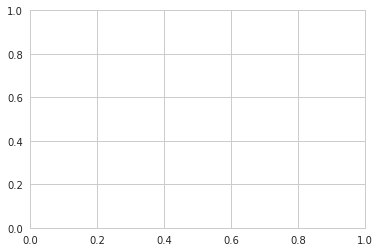

In [36]:
ax = plt.subplot()
plt.scatter(X0, y_df4)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()